1- install readxl library to read an excel sheet.

In [1]:
installed.packages("readr")
library("readr")
library("glue")
library("dplyr")
library("ggplot2")
library("stringr")
library("repr")
library("data.table")
library("lubridate")

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
# read dataset using read.csv
i <- 1
df <- read.csv(glue("20210{i}-divvy-tripdata.csv"))
head(df)

Store all dataframes in a list:

In [ ]:
df_list <- list()
for (i in 1:12){
  if (i <10){
    df_list[[i]] <- read.csv(glue("20210{i}-divvy-tripdata.csv"))
  }
  else {
    df_list[[i]] <- read.csv(glue("2021{i}-divvy-tripdata.csv"))
  }
}

Check length of the list

In [ ]:
length(df_list)

[1] 12

View first dataframe using head

In [ ]:
head(df_list[[1]])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


Join all dataframes vertically using bind_rows

In [ ]:
df <- bind_rows(df_list)
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


In [ ]:
# save joined dataframes to a csv file
write.csv(df, "2021-divvy-tripdata.csv", row.names= FALSE)

In [2]:
#read.csv is much slower than fread
# df <- read.csv("2021-divvy-tripdata.csv")
df <- fread("2021-divvy-tripdata.csv", data.table= FALSE)
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


Ensure that dimension of joined dataframes equal to the summation dimension of all the dataframes

In [ ]:
df_dim_sum <- 0
for (i in 1:12){
  df_dim_sum <- df_dim_sum + dim(df_list[[i]])
}
dim(df)
df_dim_sum

[1] 5595063      13

[1] 5595063     156

View data and create summary

In [ ]:
# View(df)
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual


In [ ]:
summary(df)

   ride_id          rideable_type        started_at                 
 Length:5595063     Length:5595063     Min.   :2021-01-01 00:02:05  
 Class :character   Class :character   1st Qu.:2021-06-06 23:52:40  
 Mode  :character   Mode  :character   Median :2021-08-01 01:52:11  
                                       Mean   :2021-07-29 07:41:02  
                                       3rd Qu.:2021-09-24 16:36:16  
                                       Max.   :2021-12-31 23:59:48  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-01-01 00:08:39   Length:5595063     Length:5595063    
 1st Qu.:2021-06-07 00:44:21   Class :character   Class :character  
 Median :2021-08-01 02:21:55   Mode  :character   Mode  :character  
 Mean   :2021-07-29 08:02:58                                        
 3rd Qu.:2021-09-24 16:54:05                                        
 Max.   :2022-01-03 17:32:18      

In [ ]:
colnames(df)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Clean Data:

1-Remove duplicates: The dataset doesn't include duplicates.

In [ ]:
dim(df)
dim(distinct(df))

[1] 5595063      13

[1] 5595063      13

In [ ]:
# dim(df)
# dim(df[duplicated(df)])
# df <- df[!duplicated(df)]
#just in case we can update our df with the unique df
# df <- unique(df)

In [ ]:
dim(df)

[1] 5595063      13

In [ ]:
#count missing value per column
colSums(is.na(df))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0                  0                  0                  0 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               4771               4771 
     member_casual 
                 0

In [ ]:
# location of missing value in end_station_name column
# which(is.na(df$end_station_name))

#use sapply function to identify position of the missing value for any column in the dataframe
sapply(df, function(x) which(is.na(x)))
#outcome: Since null values are only in "end_lat" and "end_lng" columns, I decided to keep these rows as
# they contain other useful information.

$ride_id
integer(0)

$rideable_type
integer(0)

$started_at
integer(0)

$ended_at
integer(0)

$start_station_name
integer(0)

$start_station_id
integer(0)

$end_station_name
integer(0)

$end_station_id
integer(0)

$start_lat
integer(0)

$start_lng
integer(0)

$end_lat
   [1]    5970    6179    6185    6229    6241    6356    6401    6521    6593
  [10]    6613    6614    6684    6840    6953    7021    7048    7135    7195
  [19]    7222    7235    7251    7317    7331    7336    7486    7542    7592
  [28]    7594    7598    7600    7825    7897    7941   34036   34089   34192
  [37]   34245   34325   34390   34398   34518   34536   34783   34926   34938
  [46]   35508   35624   35634   35672   35729   35776   35819   36001   36078
  [55]   36109   36214   36407   36410   36434   36462   69547   69568   69604
  [64]   69675   69748   69892   69966   69981   70105   70146   70246   70359
  [73]   71690   72284   72293   72315   72521   72524   72590   72614   72672
  [82]   73369   73594   75448   75476   83513   86126   86597   87119   87156
  [91]   87320   87329   88476   88493   89541   89550   91973   95313   95323
 [100]   95941   95944   95948   96026  105429  105431  105476  105493  105512
 [109]  105540  105556  105558  105589  105592  105598  105641  105683  105816
 [118]  105822  105856  119388  119391  119414  119433  119438  119444  119445
 [127]  119450  119479  119488  132332  132339  132356  132394  132423  132443
 [136]  132494  132531  132560  132569  132600  132662  132693  132715  132716
 [145]  132776  132799  132804  132811  132819  132849  132850  132871  132900
 [154]  132947  132993  133001  133017  133046  133057  133076  133079  133081
 [163]  133092  133105  133106  133139  133195  133207  133219  133238  137715
 [172]  137765  137777  137790  137793  137801  137813  137864  137867  137946
 [181]  137963  138006  138037  138067  138076  138090  138092  138157  138176
 [190]  138179  138199  138231  138244  138274  138288  138295  138315  138329
 [199]  138333  138368  138449  138458  138495  138496  138508  138547  138561
 [208]  138563  138572  138576  138614  138619  138649  138739  138743  138750
 [217]  138751  138770  138793  138795  138842  141960  141988  142004  142007
 [226]  142023  142027  142036  142046  142048  142079  142083  142126  142134
 [235]  142138  142147  142150  142177  142199  142208  142233  142256  142269
 [244]  142308  142338  142339  142340  142349  142402  142425  142431  142458
 [253]  142485  142493  142494  142502  142514  142520  142533  142534  142556
 [262]  142560  142565  142611  142621  142627  142628  142631  142656  142658
 [271]  142667  142670  142679  142680  142682  142703  142763  142786  142841
 [280]  142842  142866  142877  142878  142916  142933  142941  142950  142953
 [289]  142962  143110  143368  143480  143496  144019  144022  144050  144090
 [298]  145339  145518  145524  145904  146088  146112  146114  146128  146146
 [307]  146193  146211  146213  146214  146218  146278  146303  146393  146419
 [316]  146446  146453  235997  236296  236560  236787  236793  237005  237019
 [325]  237066  237084  237288  237396  237397  237448  237503  237505  237511
 [334]  237543  237550  237627  237660  237701  237715  237759  237762  237772
 [343]  237790  238048  238282  238321  238625  238636  238668  238730  239002
 [352]  239005  239021  239039  239247  239265  239289  239348  239464  239667
 [361]  239684  239870  239888  239894  239964  239981  239987  239993  240057
 [370]  240066  240071  240082  240119  240162  240204  240251  240265  240317
 [379]  240407  240612  240619  240686  240766  240767  240863  240911  241023
 [388]  241118  241351  241352  241391  241392  241437  241446  241720  242003
 [397]  242037  242124  242308  242311  242470  242476  242478  242495  242556
 [406]  242650  242664  242712  242744  242971  242988  243414  245091  245558
 [415]  245560  245772  246048  246204  246354  246526  246645  246659  246720
 [424]  246721  24

In [ ]:
# check if there is misspelling in rideable_type, member_casual, start_station_name, end_station_name
unique(df["rideable_type"])
# the dataset has three types of bike

,rideable_type
,<chr>
1,electric_bike
10,classic_bike
85,docked_bike


In [ ]:
unique(df["member_casual"])

,member_casual
,<chr>
1,member
5,casual


In [86]:
unique(str_trim(df$end_station_name))

[1] ""                                                     
  [2] "Wood St & Augusta Blvd"                               
  [3] "California Ave & North Ave"                           
  [4] "Wells St & Elm St"                                    
  [5] "Sacramento Blvd & Franklin Blvd"                      
  [6] "Western Ave & Walton St"                              
  [7] "Damen Ave & Clybourn Ave"                             
  [8] "Leavitt St & North Ave"                               
  [9] "Honore St & Division St"                              
 [10] "Ogden Ave & Chicago Ave"                              
 [11] "Southport Ave & Clark St"                             
 [12] "Bissell St & Armitage Ave"                            
 [13] "Broadway & Granville Ave"                             
 [14] "Clark St & Lincoln Ave"                               
 [15] "California Ave & Division St"                         
 [16] "California Ave & Milwaukee Ave"                       
 [17] "LaSalle St & Jackson Blvd"                            
 [18] "Clark St & Elmdale Ave"                               
 [19] "Smith Park"                                           
 [20] "Ashland Ave & Belle Plaine Ave"                       
 [21] "Streeter Dr & Grand Ave"                              
 [22] "Franklin St & Chicago Ave"                            
 [23] "Dearborn St & Erie St"                                
 [24] "Fairbanks Ct & Grand Ave"                             
 [25] "Sheridan Rd & Irving Park Rd"                         
 [26] "Western Ave & Roscoe St"                              
 [27] "Field Blvd & South Water St"                          
 [28] "Lincoln Ave & Fullerton Ave"                          
 [29] "Clark St & Elm St"                                    
 [30] "Sedgwick St & Huron St"                               
 [31] "Ravenswood Ave & Lawrence Ave"                        
 [32] "Halsted St & 21st St"                                 
 [33] "Wentworth Ave & 24th St (Temp)"                       
 [34] "Lake Shore Dr & Monroe St"                            
 [35] "Southport Ave & Clybourn Ave"                         
 [36] "Wells St & Evergreen Ave"                             
 [37] "Clark St & Lake St"                                   
 [38] "Clark St & Chicago Ave"                               
 [39] "Sheridan Rd & Montrose Ave"                           
 [40] "State St & Randolph St"                               
 [41] "Stockton Dr & Wrightwood Ave"                         
 [42] "State St & Pearson St"                                
 [43] "Sheffield Ave & Kingsbury St"                         
 [44] "Milwaukee Ave & Grand Ave"                            
 [45] "Francisco Ave & Foster Ave"                           
 [46] "Winchester (Ravenswood) Ave & Balmoral Ave"           
 [47] "Western Ave & Lunt Ave"                               
 [48] "Western Ave & Leland Ave"                             
 [49] "Aberdeen St & Randolph St"                            
 [50] "Burling St & Diversey Pkwy"                           
 [51] "Prairie Ave & 43rd St"                                
 [52] "Morgan St & Lake St"                                  
 [53] "Halsted St & Dickens Ave"                             
 [54] "Aberdeen St & Monroe St"                              
 [55] "Marine Dr & Ainslie St"                               
 [56] "Millennium Park"                                      
 [57] "Halsted St & North Branch St"                         
 [58] "Glenwood Ave & Touhy Ave"                             
 [59] "Columbus Dr & Randolph St"                            
 [60] "Lincoln Ave & Sunnyside Ave"                          
 [61] "Lincoln Ave & Diversey Pkwy"                          
 [62] "Milwaukee Ave & Wabansia Ave"                         
 [63] "Calumet Ave & 21st St"                                
 [64] "Halsted St & 37th St"                                 
 [65] "Clarendon Ave & Gordon Ter"

In [ ]:
#check if "start_station_name" column has white space
df_with_whitespace <- df[df$start_station_name != str_trim(df$start_station_name), ]
df_with_whitespace

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [ ]:
#check if "end_station_name" column has white space
df_with_whitespace <- df[df$end_station_name != str_trim(df$end_station_name), ]
df_with_whitespace

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [3]:
# add month and weekday columns to the data frame
# label = True retuns the month/wday name not the numeric value
# add trip duration column for each ride
df <- df %>%
  mutate(month = lubridate::month(as_datetime(started_at), label = TRUE, abbr= TRUE),
  weekday = lubridate::wday(as_datetime(started_at), label = TRUE, abbr = TRUE),
  trip_duration_mins = round(as.numeric(difftime(as_datetime(ended_at), as_datetime(started_at), units="mins")), digits=2) )
head(df)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,weekday,trip_duration_mins
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<ord>,<ord>,<dbl>
1,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,,,41.90034,-87.69674,41.89,-87.72,member,Jan,Sat,10.42
2,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,,,41.90033,-87.69671,41.90,-87.69,member,Jan,Wed,4.07
3,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,,,41.90031,-87.69664,41.90,-87.70,member,Jan,Thu,1.33
4,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,,,41.90040,-87.69666,41.92,-87.69,member,Jan,Thu,11.70
5,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,,,41.90033,-87.69670,41.90,-87.70,casual,Jan,Sat,0.72
6,5D8969F88C773979,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,17660,,,41.90041,-87.69676,41.94,-87.71,casual,Jan,Sat,53.78


Data Exploration

Calculate number of times a member or casual rode a bike

In [4]:
df %>%
  group_by(member_casual) %>%
  summarize(count_member_casual = n())

member_casual,count_member_casual
<chr>,<int>
casual,2529005
member,3066058


In [33]:
3066058/2529005

[1] 1.212357

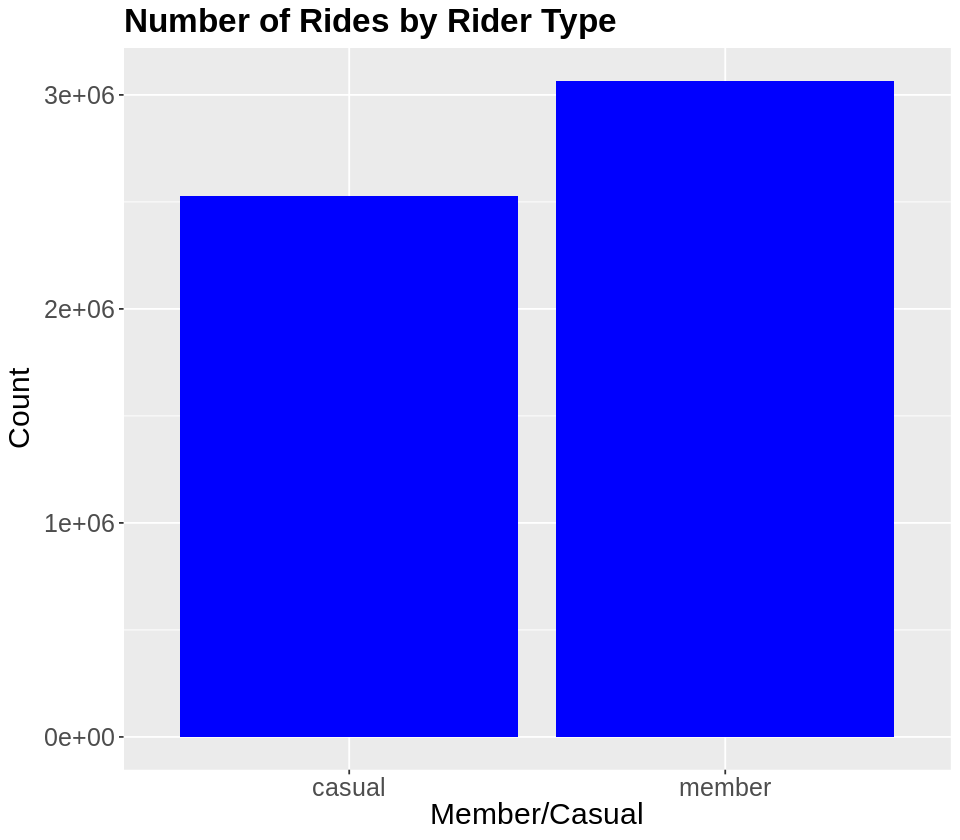

In [5]:
# Set plot size in inches
options(repr.plot.width = 8, repr.plot.height = 7)

df %>%
  group_by(member_casual) %>%
  ggplot(aes(x= member_casual)) + geom_bar( fill = "blue") +
  labs(
    title = "Number of Rides by Rider Type",
    x = "Member/Casual",
    y = "Count"

  ) +
    theme(
    plot.title = element_text(size=20, face = "bold"),
    axis.text = element_text(size=15),
    axis.title = element_text(size=18)
    )
# outcomes: Bike usage among members was 1.2 times higher than among casual riders throughout the year.

In [6]:
df %>%
  group_by(member_casual,month ) %>%
  summarize(count = n()) %>%
  arrange(month)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month,count
<chr>,<ord>,<int>
casual,Jan,18117
member,Jan,78717
casual,Feb,10131
member,Feb,39491
casual,Mar,84033
member,Mar,144463
casual,Apr,136601
member,Apr,200629
casual,May,256916


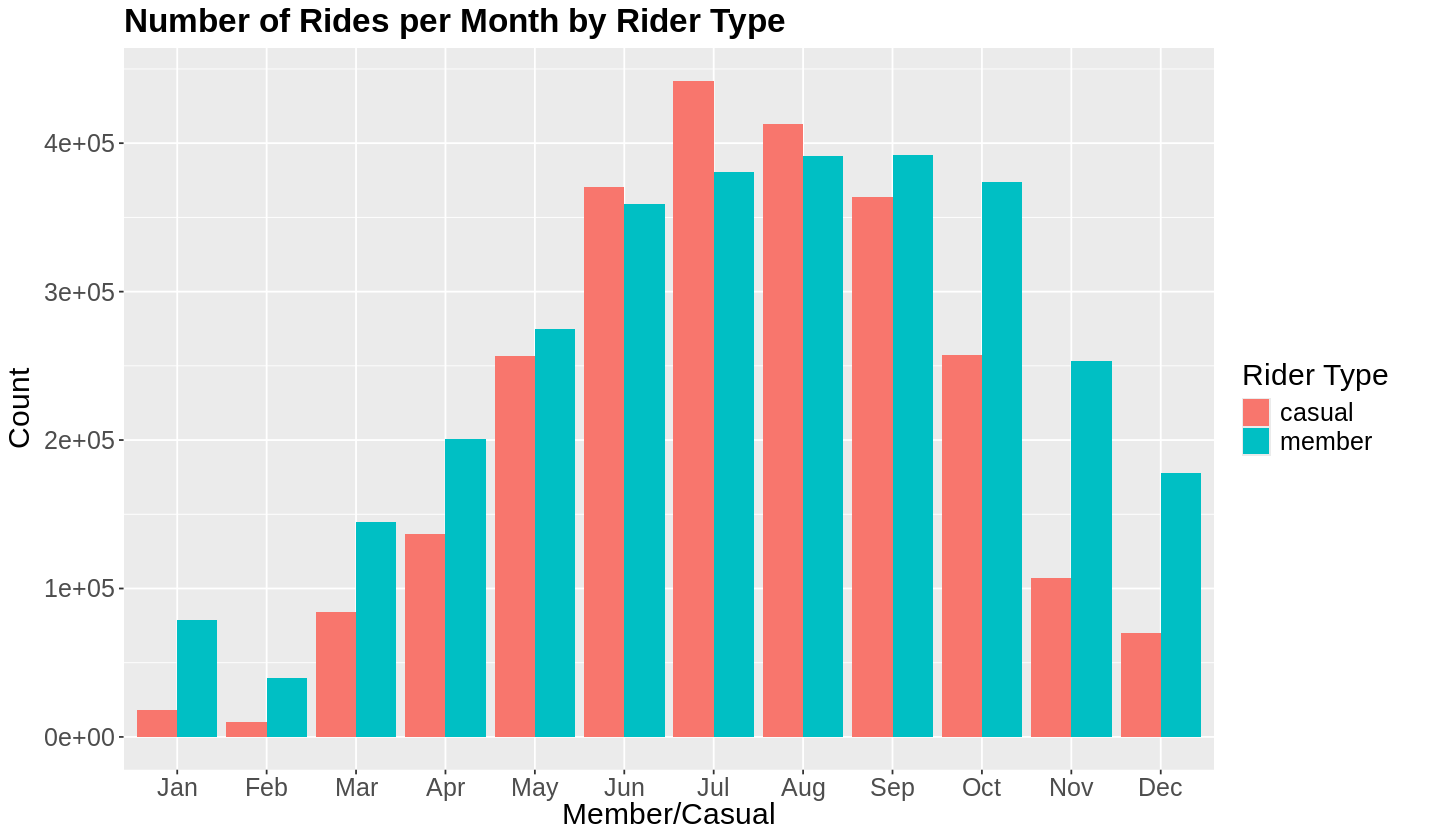

In [7]:
# Set plot size in inches
options(repr.plot.width = 12, repr.plot.height = 7)

df %>%
  group_by(member_casual,month ) %>%
  ggplot(aes(x= month, fill = member_casual)) + geom_bar(position = "dodge") +
  labs(
    title = "Number of Rides per Month by Rider Type",
    x = "Member/Casual",
    y = "Count",
    fill = "Rider Type"

  ) +
    theme(
    plot.title = element_text(size=20, face = "bold"),
    axis.text = element_text(size=15),
    axis.title = element_text(size=18),
    legend.title = element_text(size=18),
    legend.text= element_text(size=15)
    )
  # outcome: Bike rides by casual users exceeded those by members in the summer months—June through August.
  # The months of June to September recorded the most rides across both rider categories.

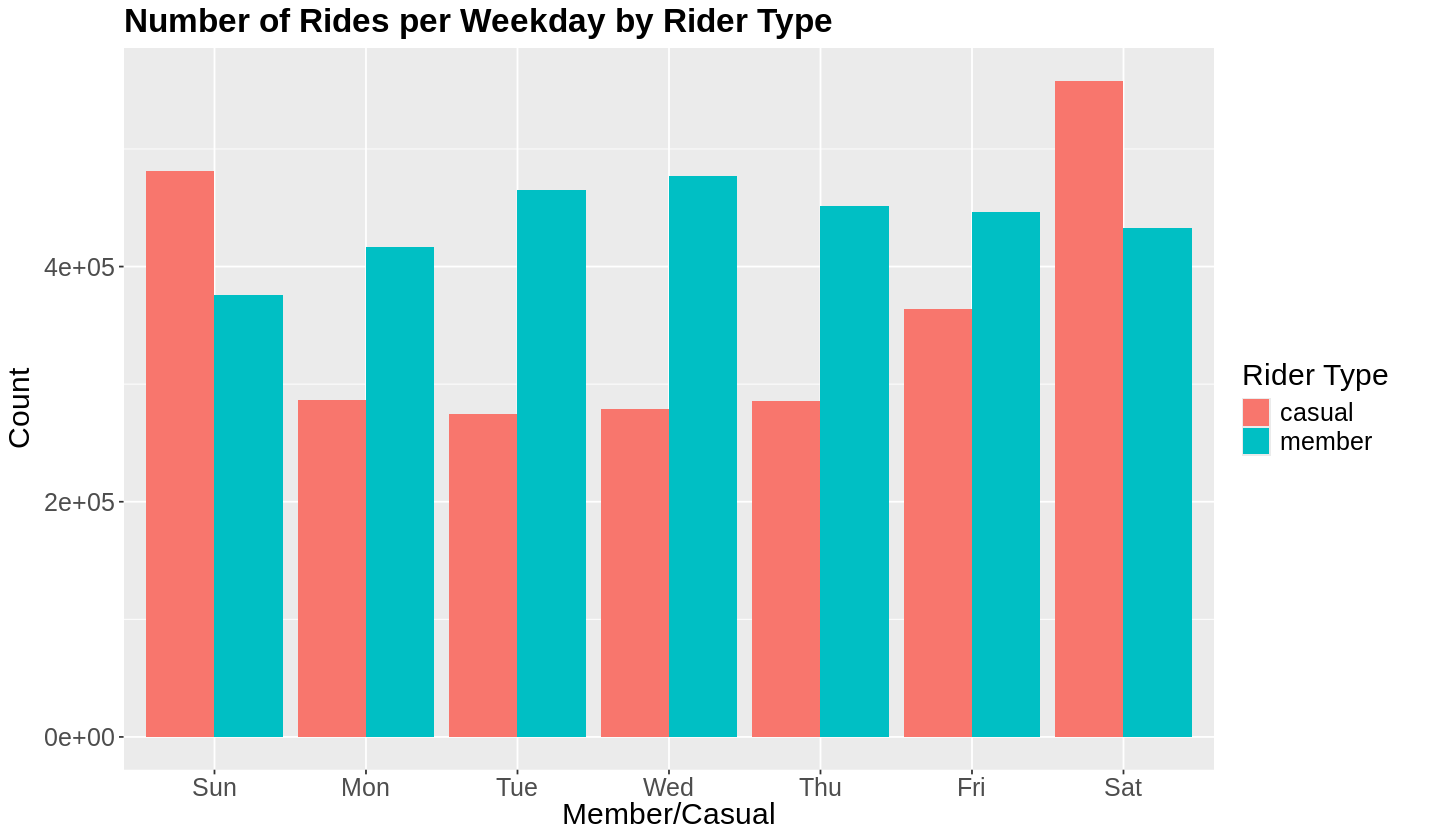

In [8]:
# Set plot size in inches
options(repr.plot.width = 12, repr.plot.height = 7)

df %>%
  group_by(member_casual,weekday ) %>%
  ggplot(aes(x= weekday, fill = member_casual)) + geom_bar(position = "dodge") +
  labs(
    title = "Number of Rides per Weekday by Rider Type",
    x = "Member/Casual",
    y = "Count",
    fill = "Rider Type"

  ) +
    theme(
    plot.title = element_text(size=20, face = "bold"),
    axis.text = element_text(size=15),
    axis.title = element_text(size=18),
    legend.title = element_text(size=18),
    legend.text= element_text(size=15)
    )

  # outcome: Casual riders were more active on weekends (Saturday and Sunday),
  # whereas members tended to ride more frequently on weekdays.

Bike usage by bike type

Warning message in plot_theme(plot):
“The `subplot.title` theme element is not defined in the element hierarchy.”


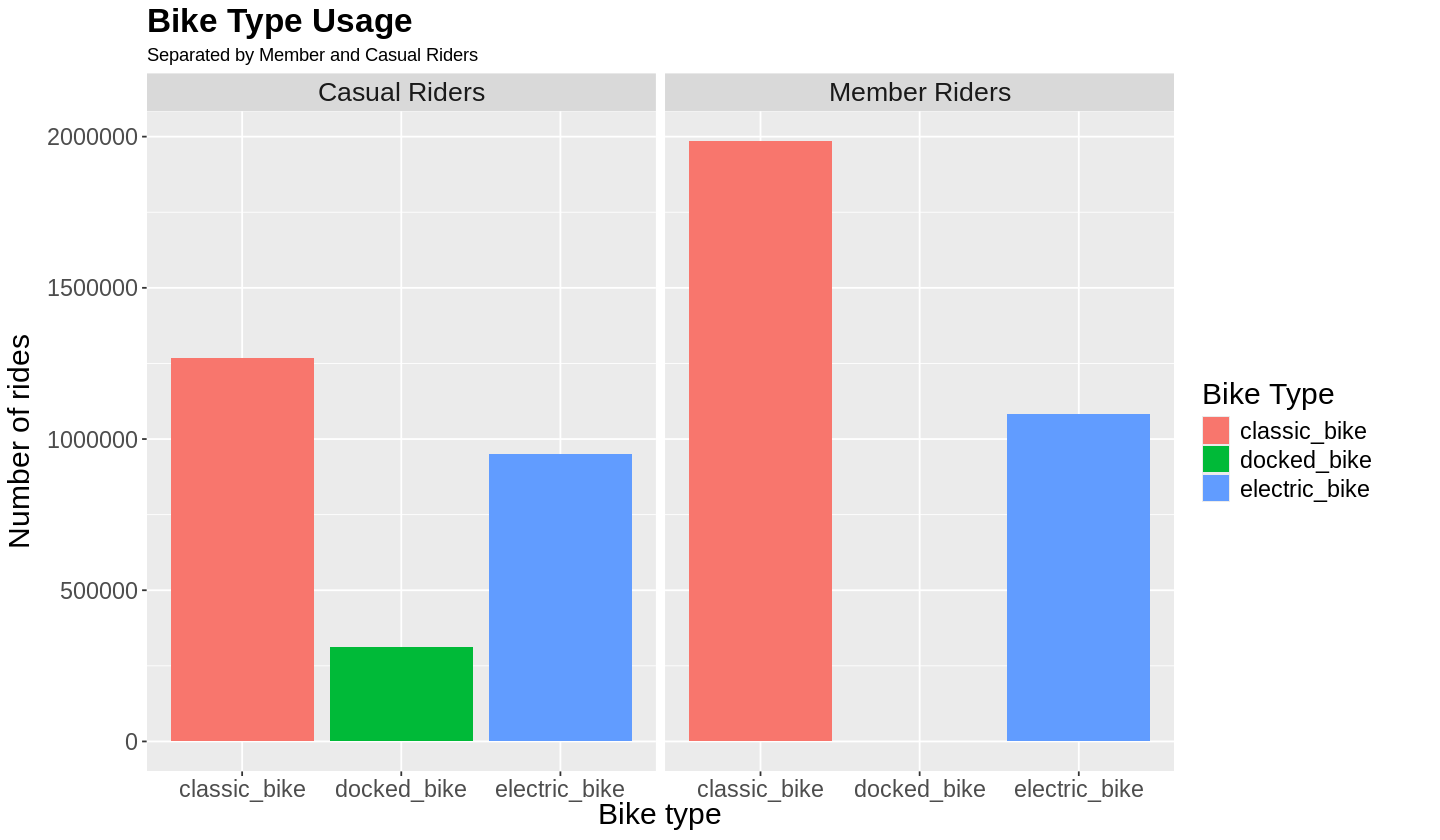

In [80]:
df %>%
  group_by(member_casual,rideable_type ) %>%
  ggplot(mapping= aes(x= rideable_type, fill = rideable_type)) +
  geom_bar() +
  facet_wrap(~member_casual, ncol = 2, labeller = as_labeller(c(
    member = "Member Riders",
    casual = "Casual Riders"))) +
    labs(
    title = "Bike Type Usage",
    subtitle = "Separated by Member and Casual Riders",
    fill = "Bike Type",
    y= "Number of rides",
    x= "Bike type"
    ) +
      theme(
      plot.title = element_text(size =20, face = "bold"),
      subplot.title =element_text(size =18),
      axis.title = element_text(size =18),
      axis.text = element_text(size =14),
      legend.title = element_text(size =18),
      legend.text = element_text(size =14),
      strip.text = element_text(size =16)
      )

In [43]:
df %>%
  group_by(month, member_casual,rideable_type ) %>%
  filter(member_casual == "member") %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T))

`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


month,member_casual,rideable_type,total_trip_duration_mins
<ord>,<chr>,<chr>,<dbl>
Jan,member,classic_bike,714938.73
Jan,member,docked_bike,2.63
Jan,member,electric_bike,298379.66
Feb,member,classic_bike,572713.93
Feb,member,electric_bike,139954.85
Mar,member,classic_bike,1519027.40
Mar,member,electric_bike,498088.08
Apr,member,classic_bike,2135963.99
Apr,member,electric_bike,805312.98


In [51]:

df %>%
  group_by(month, member_casual,rideable_type ) %>%
  filter(rideable_type == "docked_bike") %>%
  summarize(count= n())

`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


month,member_casual,rideable_type,count
<ord>,<chr>,<chr>,<int>
Jan,casual,docked_bike,2133
Jan,member,docked_bike,1
Feb,casual,docked_bike,1265
Mar,casual,docked_bike,15648
Apr,casual,docked_bike,24694
May,casual,docked_bike,43306
Jun,casual,docked_bike,51745
Jul,casual,docked_bike,57650
Aug,casual,docked_bike,45149


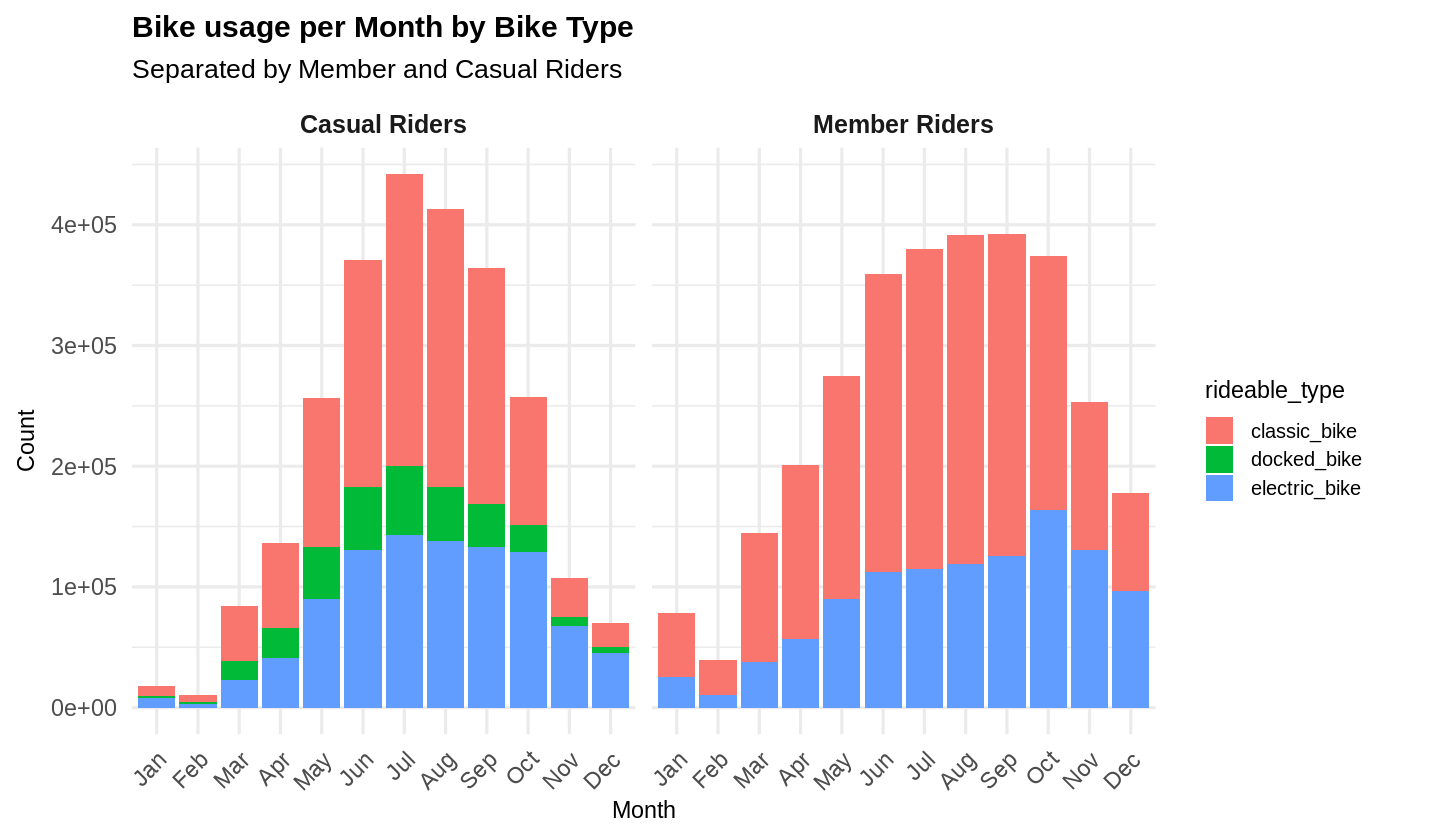

In [47]:
#Bike usage per month for member/casual by bike type


# Set plot size in inches
options(repr.plot.width = 12, repr.plot.height = 7)

df %>%
  group_by(month, member_casual,rideable_type ) %>%
  ggplot(mapping= aes(x= month,fill = rideable_type)) +
  geom_bar()  +
  facet_wrap(~member_casual, ncol = 2, labeller = as_labeller(c(
    member = "Member Riders",
    casual = "Casual Riders"))) +
  labs(
    title = "Bike usage per Month by Bike Type",
    subtitle = "Separated by Member and Casual Riders",
    x = "Month",
    y = "Count",
    color = "Bike Type"
  )  +
    theme_minimal(base_size = 20) +
    theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust=1),
    strip.text = element_text(size = 15, face = "bold"),  # Facet (subplot) titles
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

  # outcome: Casual and member riders use classic bikes more than electric bikes across most months.
# Docked bikes are the least preferred option by casual riders and are not used by members.

What is the total trip duration by a member or casual rider?


In [59]:
df %>%
  group_by(member_casual) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T))

member_casual,total_trip_duration_mins
<chr>,<dbl>
casual,80930556
member,41799074


In [60]:
80930556/41799074

[1] 1.936181

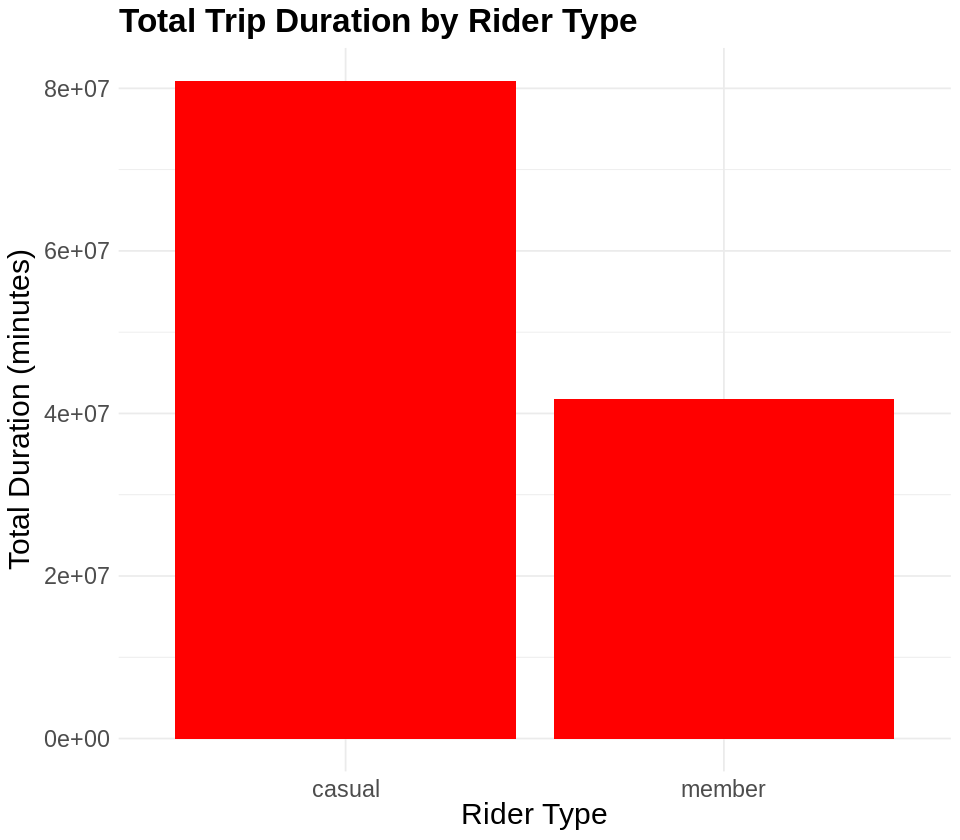

In [66]:
# Set plot size in inches
options(repr.plot.width = 8, repr.plot.height = 7)

df %>%
  group_by(member_casual) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T)) %>%
  ggplot(mapping= aes(x= member_casual, y=total_trip_duration_mins )) +geom_bar(stat = "identity", fill = "red") +
  labs(
    title = "Total Trip Duration by Rider Type",
    x = "Rider Type",
    y = "Total Duration (minutes)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 18)
  )

  # outcome: The total trip duration for casual riders was 1.9 times higher than that of member riders.

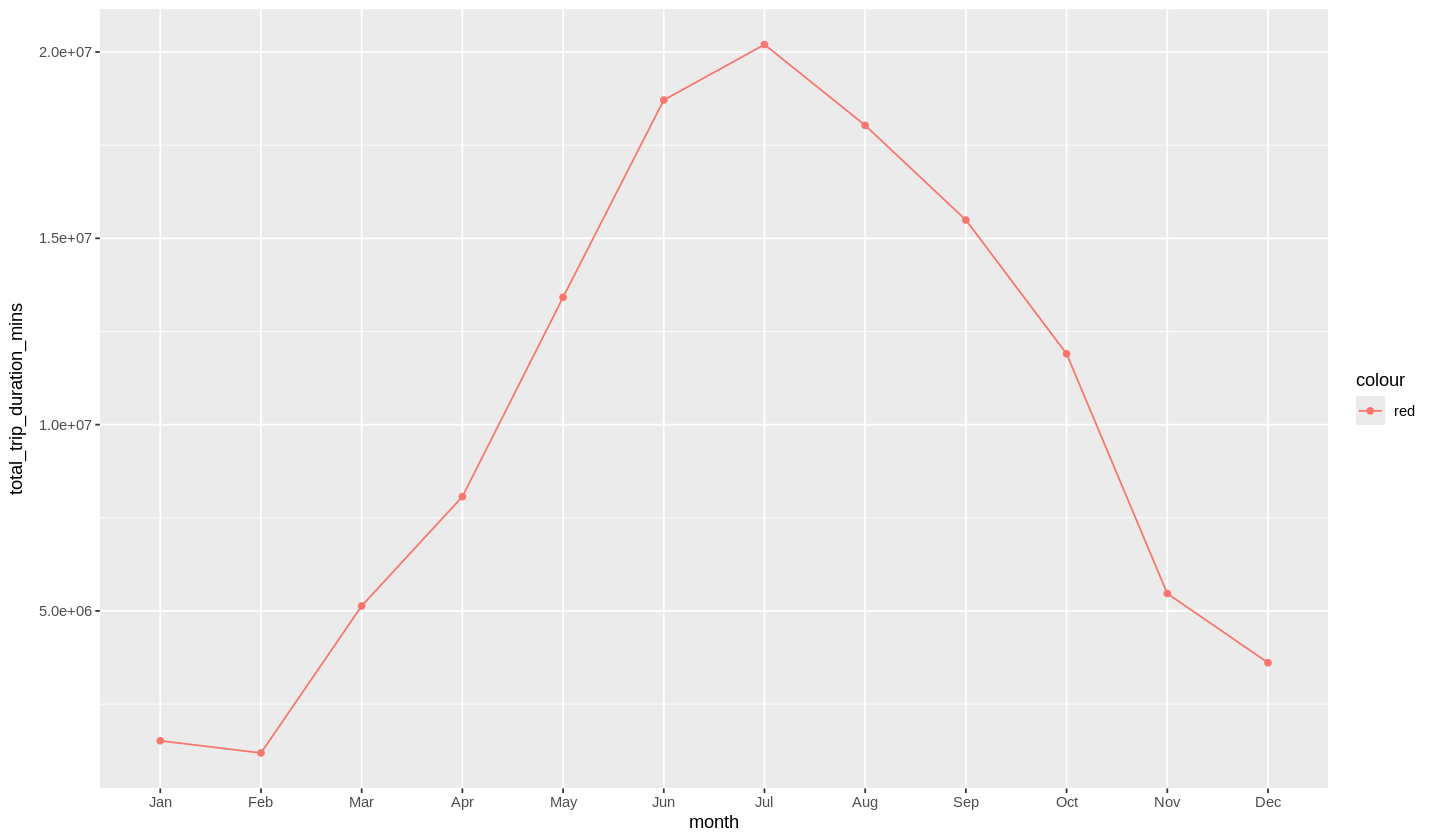

In [53]:
#total trip duration per month
df %>%
  group_by(month) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T)) %>%
  ggplot(mapping= aes(x= month, y=total_trip_duration_mins , group=1, color = "red")) +geom_line() +geom_point()
#outcome: July has the highest total trip duration, followed by a steady decline and
# reaches its lowest value in Feb.

`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


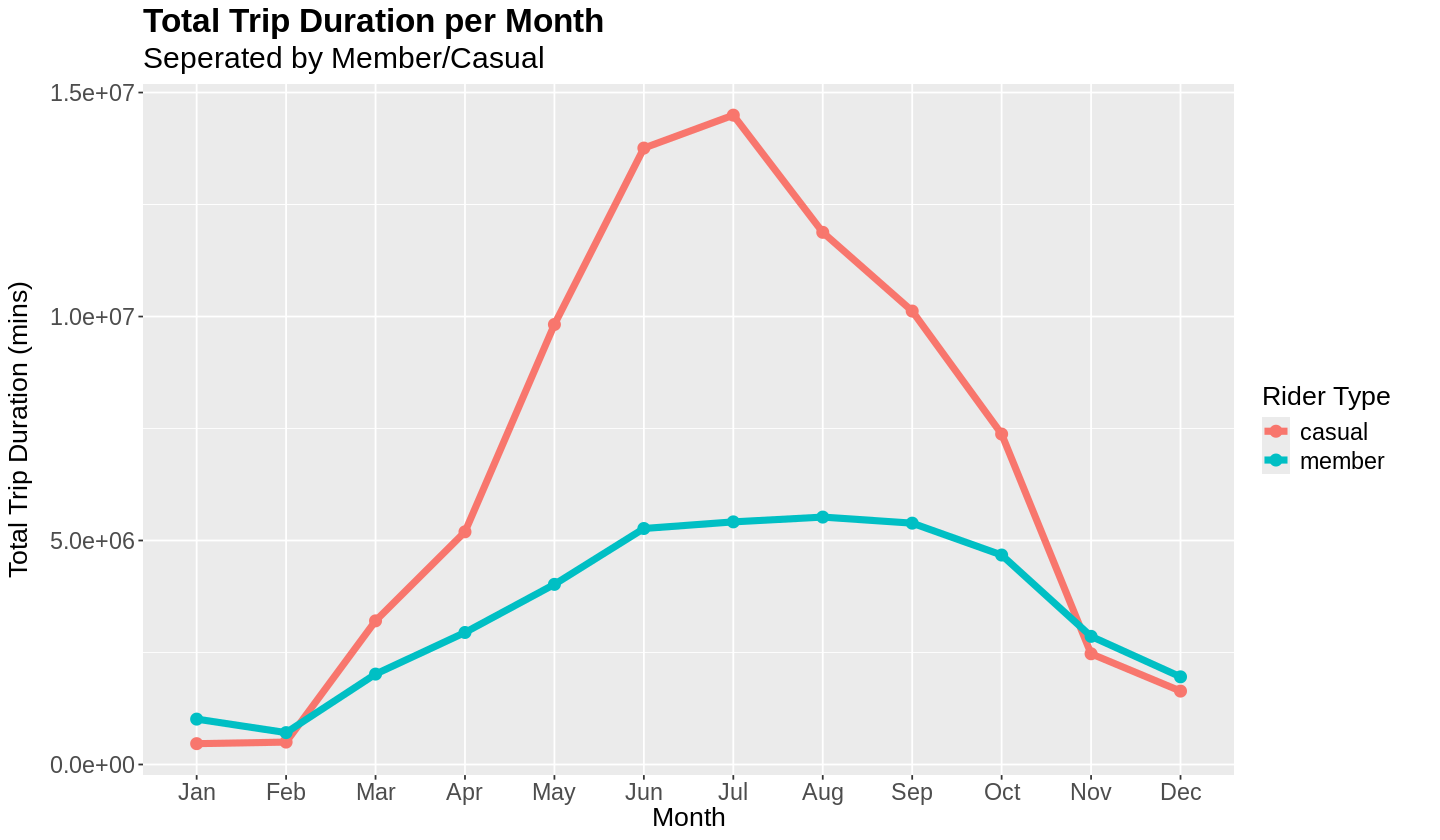

In [12]:
#total trip duration per month for member/caual
df %>%
  group_by(month, member_casual) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = TRUE)) %>%
  ggplot(mapping= aes(x= month, y=total_trip_duration_mins ,color = member_casual, group=member_casual)) +
  geom_line(linewidth=2) +
  geom_point(size=3)+
  labs(
  title = "Total Trip Duration per Month",
  subtitle= "Seperated by Member/Casual",
  x= "Month",
  y="Total Trip Duration (mins)",
  color= "Rider Type"
  )+
    theme(
    plot.title = element_text(size=20, face = "bold"),
    plot.subtitle = element_text(size=18),
    axis.title =  element_text(size=16),
    legend.title =  element_text(size=16),
    axis.text =  element_text(size=14),
    legend.text =  element_text(size=14)
    )

# outcome: Casual riders recorded a higher total trip duaration than members from Mar to Nov. For both groups, the total
#  trip duaration decreased during the winter months (Nov, Dec, Jan and Feb), and incresed during the summer months
#  (Jun, July, and Aug).


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


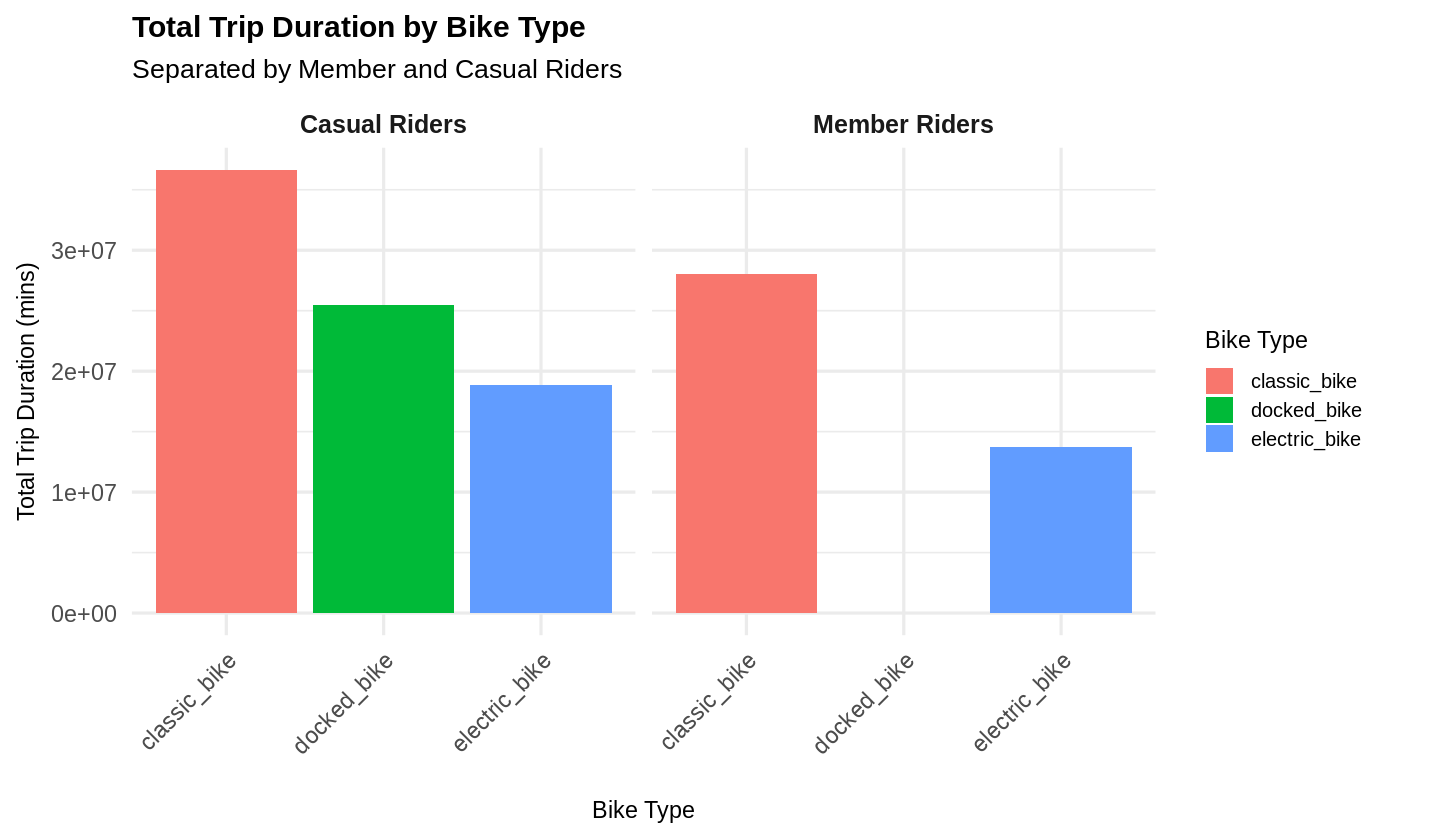

In [74]:
#total trip duration for member/casual by bike type


# Set plot size in inches
options(repr.plot.width = 12, repr.plot.height = 7)

df %>%
  group_by( member_casual,rideable_type ) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T)) %>%
  ggplot(mapping= aes(x= rideable_type, y=total_trip_duration_mins, fill = rideable_type )) +
  geom_bar(stat="identity")  +
  facet_wrap(~member_casual, ncol = 2, labeller = as_labeller(c(
    member = "Member Riders",
    casual = "Casual Riders"))) +
  labs(
    title = "Total Trip Duration by Bike Type",
    subtitle = "Separated by Member and Casual Riders",
    x = "Bike Type",
    y = "Total Trip Duration (mins)",
    fill = "Bike Type"
  )  +
    theme_minimal(base_size = 20) +
    theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust=1),
    strip.text = element_text(size = 15, face = "bold"),  # Facet (subplot) titles
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

# outcome: Casual and member riders spent more time cycling classic bikes more than the other two types across most months.
# Casual riders spent more time cycling docked bikes than electric bikes.

`summarise()` has grouped output by 'month', 'member_casual'. You can override
using the `.groups` argument.


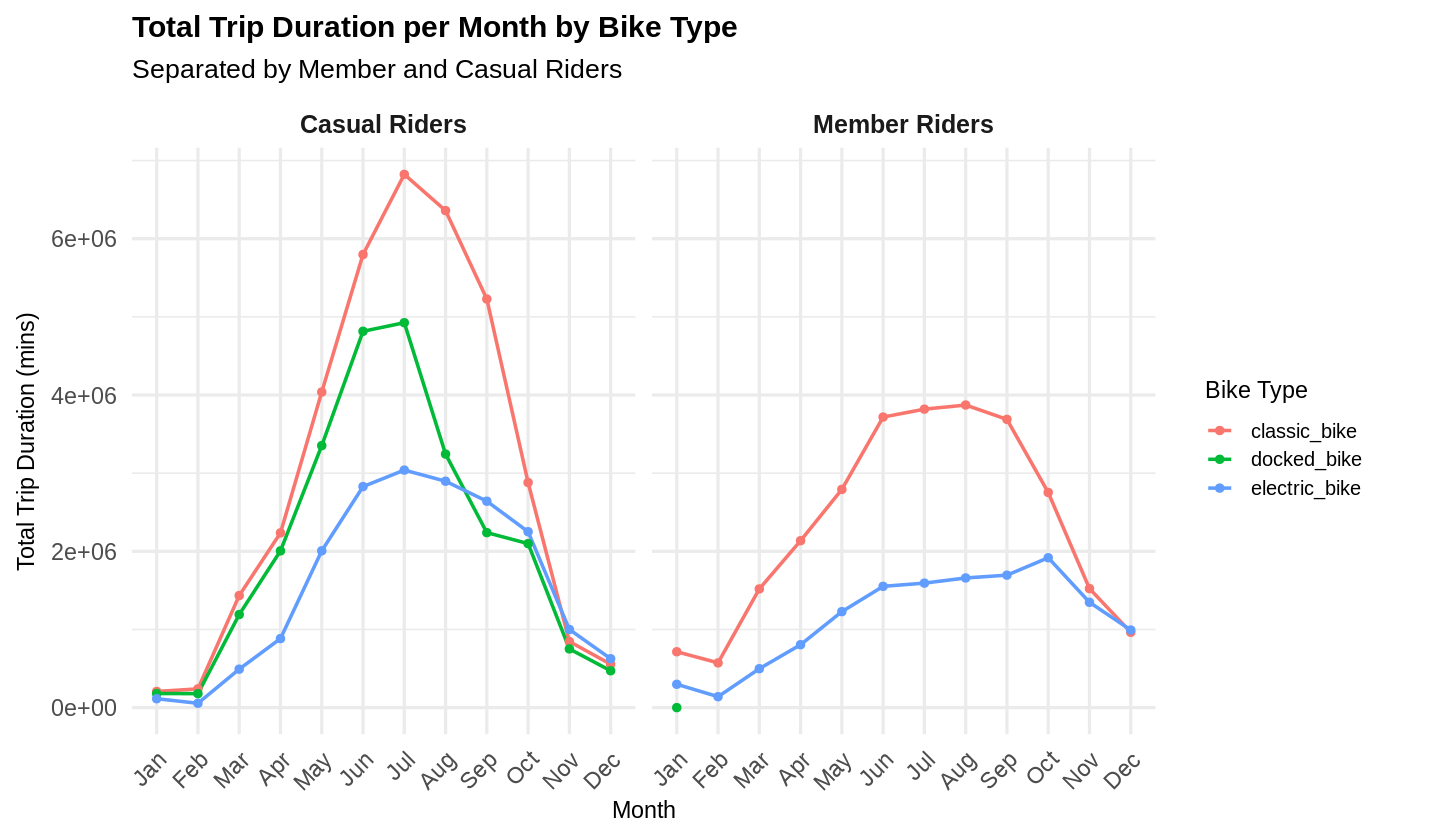

In [45]:
#total trip duration per month for member/casual by bike type


# Set plot size in inches
options(repr.plot.width = 12, repr.plot.height = 7)

df %>%
  group_by(month, member_casual,rideable_type ) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T)) %>%
  ggplot(mapping= aes(x= month, y=total_trip_duration_mins ,color = rideable_type, group=rideable_type)) +
  geom_line(linewidth=1) +
  geom_point(size=2) +
  facet_wrap(~member_casual, ncol = 2, labeller = as_labeller(c(
    member = "Member Riders",
    casual = "Casual Riders"))) +
  labs(
    title = "Total Trip Duration per Month by Bike Type",
    subtitle = "Separated by Member and Casual Riders",
    x = "Month",
    y = "Total Trip Duration (mins)",
    color = "Bike Type"
  )  +
    theme_minimal(base_size = 20) +
    theme(
    plot.title = element_text(size = 18, face = "bold"),
    plot.subtitle = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 14),
    axis.text.x = element_text(angle = 45, hjust=1),
    strip.text = element_text(size = 15, face = "bold"),  # Facet (subplot) titles
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12)
  )

# outcome: Casual and member riders spent more time cycling classic bikes more than the other two types across most months.
# Casual riders spent more time cycling docked bikes than electric bikes.

In [67]:
df %>%
  group_by(member_casual,rideable_type ) %>%
  summarize(count_bike_type = n())

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,rideable_type,count_bike_type
<chr>,<chr>,<int>
casual,classic_bike,1266657
casual,docked_bike,312342
casual,electric_bike,950006
member,classic_bike,1984371
member,docked_bike,1
member,electric_bike,1081686


`summarise()` has grouped output by 'month'. You can override using the
`.groups` argument.


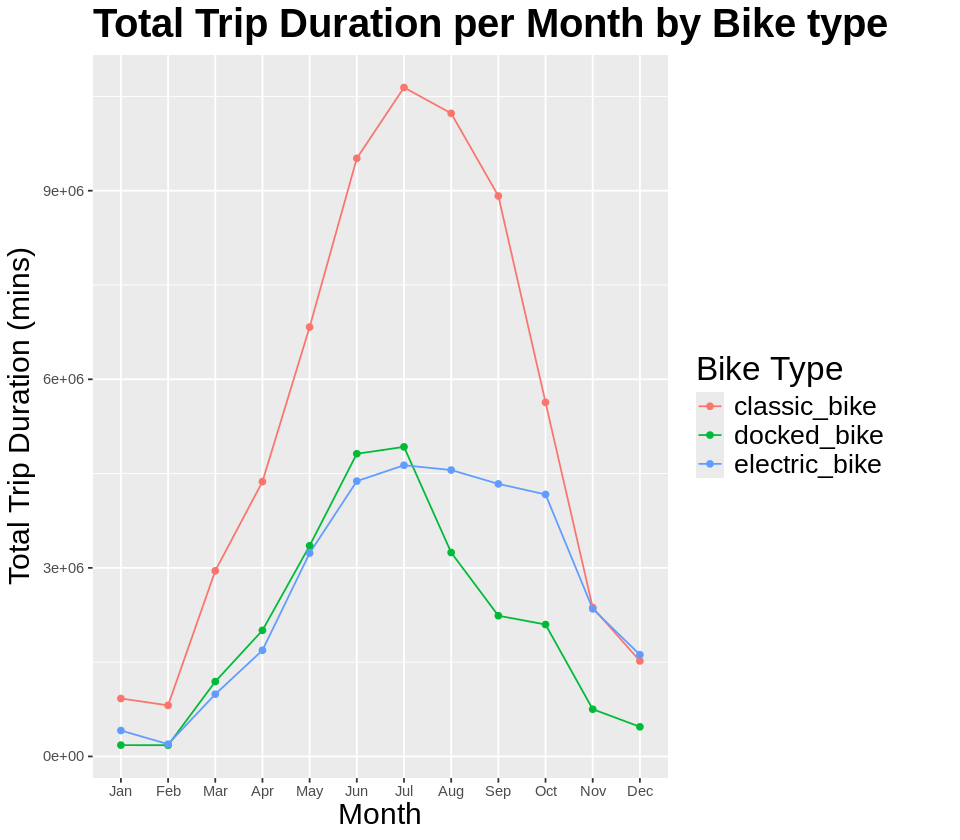

In [69]:
#total trip duration per month for casual per bike type
df %>%
  group_by(month,rideable_type ) %>%
  summarize(total_trip_duration_mins = sum(trip_duration_mins, na.rm = T)) %>%
  ggplot(mapping= aes(x= month, y=total_trip_duration_mins ,color = rideable_type, group=rideable_type)) +
  geom_line() +
  geom_point() +
  labs(
  title = "Total Trip Duration per Month by Bike type ",
  x= "Month",
  y= "Total Trip Duration (mins)",
  color = "Bike Type"
  )+
  theme(
  plot.title = element_text(size=24, face = "bold"),
  axis.title = element_text(size=18),
  legend.title = element_text(size = 20),
  legend.text = element_text(size = 16)
  )